In [1]:
#Importing libraries
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Fraud.csv")

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


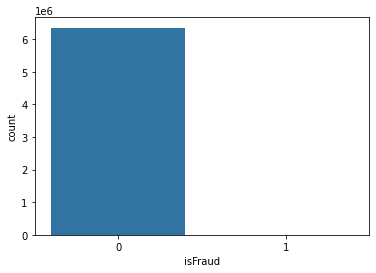

In [6]:
sns.countplot(df["isFraud"])

The data is clearly unbalanced. we will make it balance later using SMOTE.

In [7]:
df["error"]=df["oldbalanceOrg"]-df["amount"]
data=df[df["error"]>0]

Transaction amount is greater than the old balance amount.But, practically this is not possible. How can someone make transaction if he does not have enough balance in his account. So, here i am considering only columns which satisfy the above condition.

In [8]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,error
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0,0,160296.36
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0,19384.72
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0,0,29885.86
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.0,0,0,46042.29
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.0,0,0,176087.23
...,...,...,...,...,...,...,...,...,...,...,...,...
6362528,736,TRANSFER,10000000.00,C412961249,11314660.84,1314660.84,C253674970,0.0,0.0,1,0,1314660.84
6362576,741,TRANSFER,10000000.00,C780743034,45674547.89,35674547.89,C491519946,0.0,0.0,1,0,35674547.89
6362578,741,TRANSFER,10000000.00,C1111699947,35674547.89,25674547.89,C949015157,0.0,0.0,1,0,25674547.89
6362580,741,TRANSFER,10000000.00,C88849251,25674547.89,15674547.89,C1939028448,0.0,0.0,1,0,15674547.89


In [9]:
fraud=data[data["isFraud"]==1]
not_fraud=data[data["isFraud"]==0]

In [10]:
fraud.describe().round(1)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,error
count,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0
mean,450.1,9788912.4,19804479.9,10330903.1,3958.3,8961.1,1.0,0.0,10015567.5
std,205.4,1353914.8,10480085.7,10330354.8,36152.9,77347.9,0.0,0.2,10273292.3
min,4.0,42062.8,340830.4,175597.6,0.0,0.0,1.0,0.0,175597.6
25%,283.2,10000000.0,12563281.3,2627572.7,0.0,0.0,1.0,0.0,2625588.8
50%,432.5,10000000.0,16359677.7,6532477.3,0.0,0.0,1.0,0.0,6476721.7
75%,646.0,10000000.0,23881206.8,15330447.7,0.0,0.0,1.0,0.0,13881206.8
max,741.0,10000000.0,59585040.4,49585040.4,398931.4,678419.6,1.0,1.0,49585040.4


In [11]:
not_fraud.describe().round(1)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,error
count,2275356.0,2275356.0,2275356.0,2275356.0,2275356.0,2275356.0,2275356.0,2275356.0,2275356.0
mean,241.9,78305.4,2295258.5,2340762.8,911922.7,871970.1,0.0,0.0,2216953.0
std,144.3,108667.6,4465831.4,4521444.1,2897188.3,2889267.7,0.0,0.0,4427170.5
min,1.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,154.0,7221.6,53294.0,39559.1,0.0,0.0,0.0,0.0,35859.6
50%,237.0,23331.4,234623.6,206295.0,0.0,16100.6,0.0,0.0,180754.1
75%,334.0,116566.2,2469872.3,2632347.0,719904.1,620095.6,0.0,0.0,2305115.3
max,718.0,4164236.3,43818855.3,43686616.3,355381433.6,355185537.1,0.0,0.0,43686616.3


In [12]:
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,error
4440,4,TRANSFER,10000000.00,C7162498,12930418.44,2930418.44,C945327594,0.00,0.00,1,0,2930418.44
60853,9,TRANSFER,994453.20,C1121789613,1437370.87,442917.67,C254839817,194812.76,665743.67,1,0,442917.67
377151,17,CASH_OUT,42062.82,C897869440,340830.43,298767.61,C616721459,398931.35,678419.64,1,0,298767.61
481250,19,TRANSFER,10000000.00,C416779475,11861008.32,1861008.32,C380259496,0.00,0.00,1,0,1861008.32
586311,33,TRANSFER,10000000.00,C1439740840,19887819.06,9887819.06,C875288652,0.00,0.00,1,0,9887819.06
...,...,...,...,...,...,...,...,...,...,...,...,...
6362528,736,TRANSFER,10000000.00,C412961249,11314660.84,1314660.84,C253674970,0.00,0.00,1,0,1314660.84
6362576,741,TRANSFER,10000000.00,C780743034,45674547.89,35674547.89,C491519946,0.00,0.00,1,0,35674547.89
6362578,741,TRANSFER,10000000.00,C1111699947,35674547.89,25674547.89,C949015157,0.00,0.00,1,0,25674547.89
6362580,741,TRANSFER,10000000.00,C88849251,25674547.89,15674547.89,C1939028448,0.00,0.00,1,0,15674547.89


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


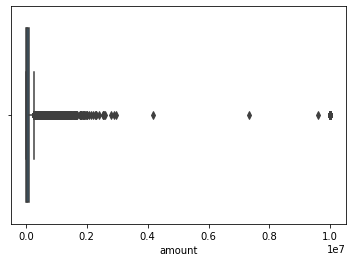

In [13]:
sns.boxplot(data["amount"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


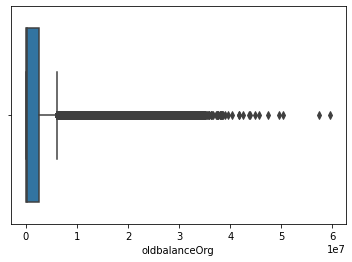

In [14]:
sns.boxplot(data["oldbalanceOrg"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


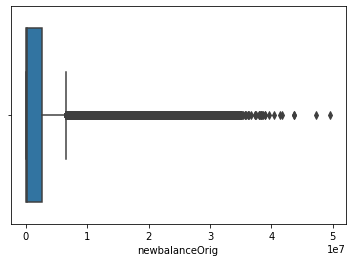

In [15]:
sns.boxplot(data["newbalanceOrig"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


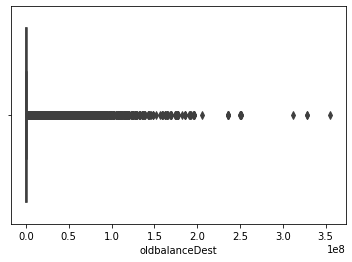

In [16]:
sns.boxplot(data["oldbalanceDest"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


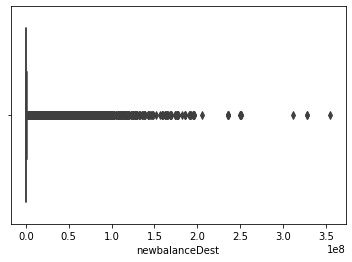

In [17]:
sns.boxplot(data["newbalanceDest"])

In [18]:
data.sort_values(by=["amount"])

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,error
2359430,190,PAYMENT,0.02,C344473063,33192.97,33192.95,M646412904,0.00,0.00,0,0,33192.95
2799608,217,PAYMENT,0.03,C807337950,205196.00,205195.97,M1035971031,0.00,0.00,0,0,205195.97
5175520,359,CASH_IN,0.04,C255705071,2265671.14,2265671.18,C1260814124,2668374.72,2668374.68,0,0,2265671.10
2359953,190,PAYMENT,0.07,C1814144923,11788.13,11788.06,M28752575,0.00,0.00,0,0,11788.06
4105537,302,PAYMENT,0.11,C1099931929,244356.00,244355.89,M713955443,0.00,0.00,0,0,244355.89
...,...,...,...,...,...,...,...,...,...,...,...,...
3542877,260,TRANSFER,10000000.00,C1799904347,10175597.64,175597.64,C1817199105,0.00,0.00,1,0,175597.64
6064990,507,TRANSFER,10000000.00,C1386014813,17239986.95,7239986.95,C407821637,0.00,0.00,1,0,7239986.95
6064976,506,TRANSFER,10000000.00,C260657856,17041719.54,7041719.54,C801890101,0.00,0.00,1,0,7041719.54
6290957,661,TRANSFER,10000000.00,C1058583308,12140888.35,2140888.35,C2061400193,0.00,0.00,1,0,2140888.35


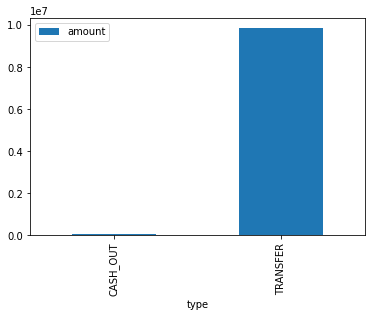

In [19]:
fraud[["type","amount"]].groupby('type').mean().plot(kind='bar')

**Feature engineering**

The value of **data["amount_to_oldbalance_ratio"]** represents the ratio of the **amount** column to the **oldbalanceOrg** column in the dataframe df. This new feature represents the proportion of the original balance that is being transferred in a given transaction.

In essence, this feature provides additional information about the scale of each transaction in relation to the customer's original balance, which can be useful in detecting fraud. For example, if the **oldbalanceOrg** is large and the **amount** is small, the **amount_to_oldbalance_ratio** will be low, indicating that a relatively small **amount** is being transferred. On the other hand, if the **oldbalanceOrg** is small and the **amount** is large, the **amount_to_oldbalance_ratio** will be high, indicating that a relatively large amount is being transferred.

In [ ]:
data['customer_amount_to_oldbalance_ratio'] = round(data['amount'] / data['oldbalanceOrg'],2)

In [ ]:
data['customer_amount_to_oldbalance_ratio']=round(data['customer_amount_to_oldbalance_ratio'],2)

In [ ]:
data["recipient_name"]=data["nameDest"].apply(lambda x:list(x)[0])
data["recipient_name"]=data["recipient_name"].replace({"M":0,"C":1})

In [ ]:
data['transaction_volume'] = data['amount'] + abs(data['oldbalanceOrg'] - data['newbalanceOrig'])

In [24]:
start_time = data["step"].min()
data["time_elapsed"] = data["step"] - start_time

# Calculate the day of the week for each step
data["day_of_week"] = (data["time_elapsed"] // 24) % 7


<ipython-input-24-43af56c034a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["time_elapsed"] = data["step"] - start_time
<ipython-input-24-43af56c034a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["day_of_week"] = (data["time_elapsed"] // 24) % 7


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["transaction_type"]=le.fit_transform(data["type"])
data.drop("type",axis=1,inplace=True)

In [26]:
def chi_square_test(x,y):
    import scipy
    from scipy.stats import chi2
    
    
    alpha=0.05    #value of alpha with 95% confidence interval                                                 
    new=pd.crosstab(x,y) #checking frequency
    df=(new.shape[0]-1)*(new.shape[1]-1) #calculating degrees of freedom
    observed_values=new.values #Observed values
    val=scipy.stats.chi2_contingency(observed_values) #calculating expected values
    expected_values=val[-1] #choosing only the expected values
    new_value=(observed_values-expected_values)**2/expected_values #caluculating chi squared values
    k=new_value.reshape(1,-1)
    chi_square_value=0 #Final or total chi squared value
    for i in k:
        for j in i:
            chi_square_value+=j
    critical_value=chi2.ppf(q=1-alpha,df=df) #Finding critical value
    p_value=1-chi2.cdf(x=chi_square_value,df=df) #Finding p value
    
    #if the p value is lesser than 0.05 we accept the null hypothesis or else we will reject
    if p_value<=alpha:
        print("Reject the null hypothesis")
    else:
        print("Accept the null hypothesis")
        
        
    #if the chi square value is lesser than the critical value,we will accept the null hypothesis or reject
    if chi_square_value<=critical_value:
        print("Accept the null hypothesis")
    else:
        print("Reject the null hypothesis")

In [27]:
def anova_test(x,y):
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    formula='{0} ~ {1}'.format(x,y)
    model=ols(formula,data=data).fit()
    anova_result=sm.stats.anova_lm(model,typ=2)
    anova_result.dropna(inplace=True,axis=0)
    for i in anova_result["PR(>F)"]:
        if i<0.05:
            print("Relationship exits")
        else:
            print("No relationship")

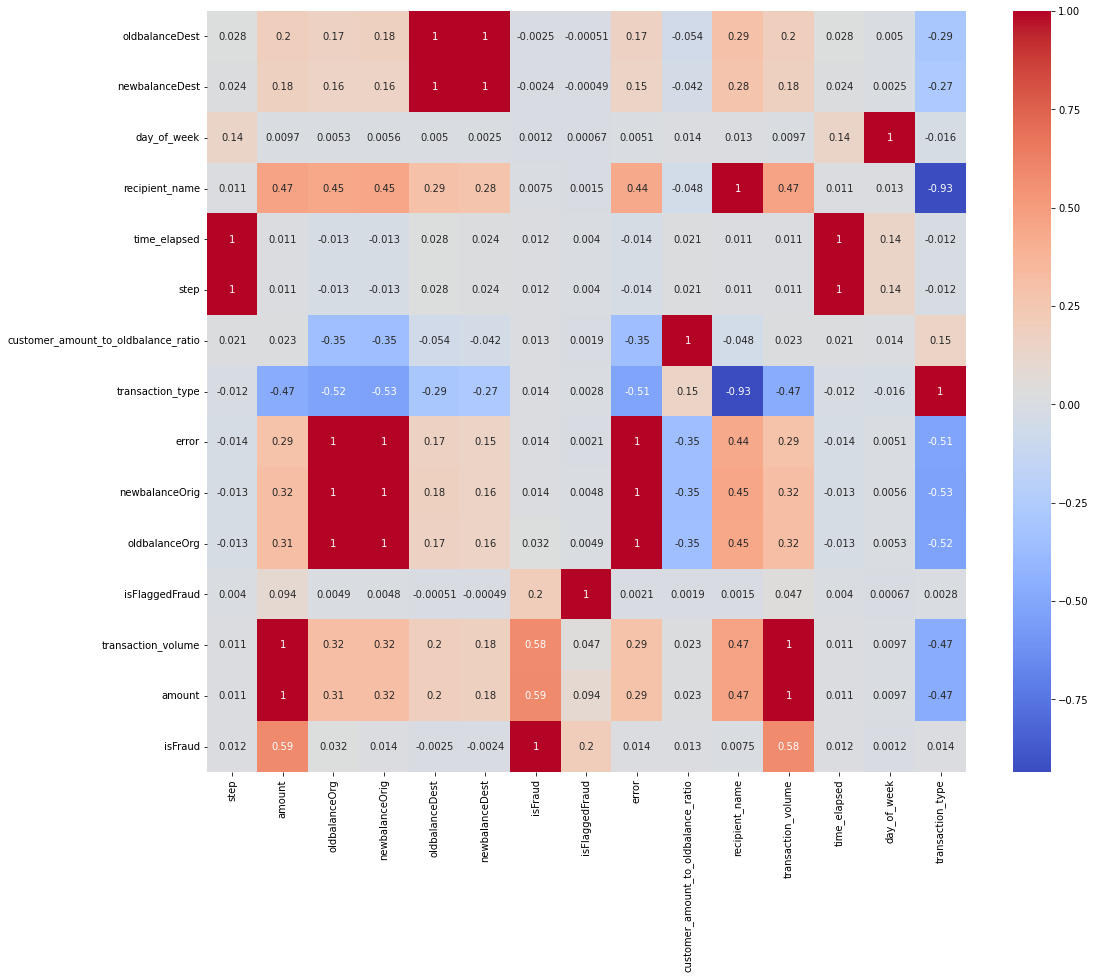

In [28]:
plt.figure(figsize=(17,14))
sns.heatmap(data.corr().sort_values(by=["isFraud"]),annot=True,cmap="coolwarm")

MULTI COLLINARITY:

* Multicollinearity is a phenomenon in regression analysis where two or more predictor variables are highly correlated with each other.

From the above correlation matrix, i can clearly see that some indipendent variables correlate with each other.So, i am dropping those columns.

In [29]:
data.drop(["nameOrig","oldbalanceOrg","oldbalanceDest","time_elapsed","error","nameDest"],axis=1,inplace=True)

In [30]:
data.drop("recipient_name",axis=1,inplace=True)

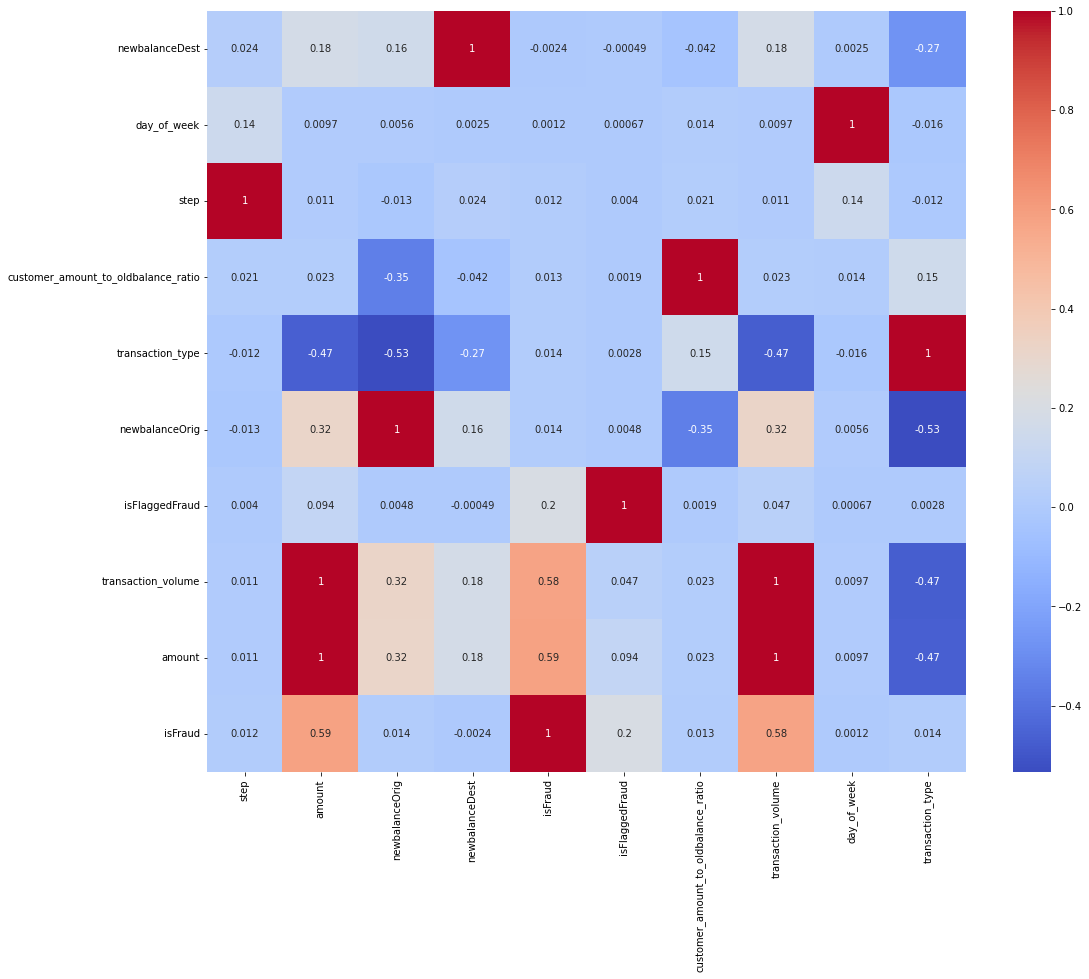

In [31]:
plt.figure(figsize=(17,14))
sns.heatmap(data.corr().sort_values(by=["isFraud"]),annot=True,cmap="coolwarm")

In [32]:
import numpy as np

**Feature scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
for i in data.columns[:-1]:
  data[[i]]=m.fit_transform(data[[i]])

In [34]:
from imblearn.over_sampling import SMOTE
x=data.drop(["isFraud"],axis=1)
y=data["isFraud"]

#Oversampling the data
smote = SMOTE()
a,b = smote.fit_resample(x,y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


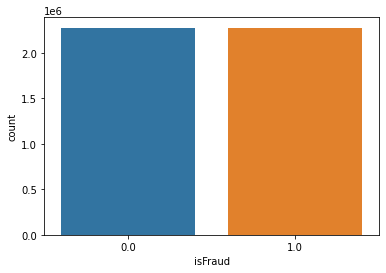

In [35]:
sns.countplot(b)

**Model building**

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [39]:
def best_model(x):
  model=x
  model.fit(x_train,y_train)
  y_p=model.predict(x_train)
  print("Training accuracy :",accuracy_score(y_train,y_p))
  y_pred=model.predict(x_test)
  print("Testing accuracy :",accuracy_score(y_test,y_pred))
  print("precision score :",precision_score(y_test,y_pred))
  print("Recall score :",recall_score(y_test,y_pred))
  print("roc_auc_score :",roc_auc_score(y_test,y_pred))

In [40]:
best_model(LogisticRegression(max_iter=300))

Training accuracy : 0.999311646064118
Testing accuracy : 0.999359441318562
precision score : 0.9999121056841254
Recall score : 0.998808151977085
roc_auc_score : 0.9993600762349412


In [41]:
best_model(XGBClassifier())

Training accuracy : 0.9999925835769079
Testing accuracy : 0.9999901114440258
precision score : 0.999980246003108
Recall score : 1.0
roc_auc_score : 0.9999901000554398


I am not further considering using other models, because i have already achieved a good score in xgboost itself.